In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_Q2.csv")

In [3]:
df.shape

(110, 2)

In [4]:
df.head()

,id,value
0,11/1/04,0.5992
1,10/1/12,0.9259
2,1/1/07,5.9182
3,2/1/06,9.2365
4,6/1/07,22.7446


In [5]:
df_test = pd.read_csv("test_Q2.csv")

In [6]:
df_test.shape

(10, 1)

In [7]:
df_test.head()

,id
0,5/1/10
1,4/1/09
2,9/1/13
3,1/1/06
4,2/1/07


In [8]:
import datetime as dt
df['id'] = pd.to_datetime(df['id'])
df_test['date'] = pd.to_datetime(df_test['id'])

In [9]:
df['day']=df['id'].dt.day
df['month'] = df['id'].dt.month
df['year'] = df['id'].dt.year

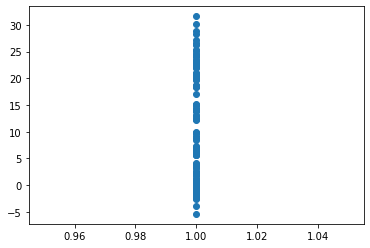

In [10]:
plt.scatter(df['day'],df['value'])
plt.show()

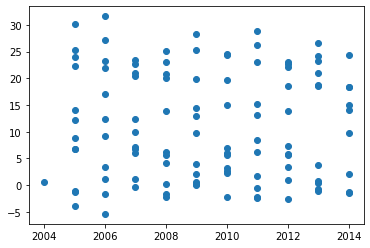

In [11]:
plt.scatter(df['year'],df['value'])
plt.show()

In [12]:
df_test['month'] = df_test['date'].dt.month

In [13]:
df_test.head()

,id,date,month
0,5/1/10,2010-05-01,5
1,4/1/09,2009-04-01,4
2,9/1/13,2013-09-01,9
3,1/1/06,2006-01-01,1
4,2/1/07,2007-02-01,2


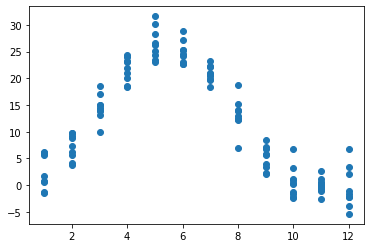

In [14]:
plt.scatter(df['month'],df['value'])
plt.show()

In [15]:
df =df.drop(['id','day','year'],axis=1)

In [16]:
df.head()

,value,month
0,0.5992,11
1,0.9259,10
2,5.9182,1
3,9.2365,2
4,22.7446,6


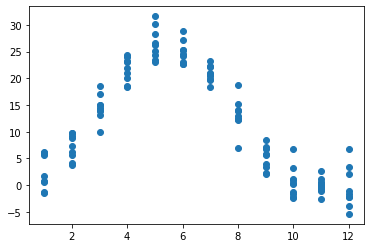

In [17]:
plt.scatter(df['month'],df['value'])

In [18]:
#  creating x and y
x = np.array(df['month']).reshape(-1,1)
y = np.array(df['value']).reshape(-1,1)

In [19]:
z =np.array(df_test['month']).reshape(-1,1)

In [20]:
# Train - test - split
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

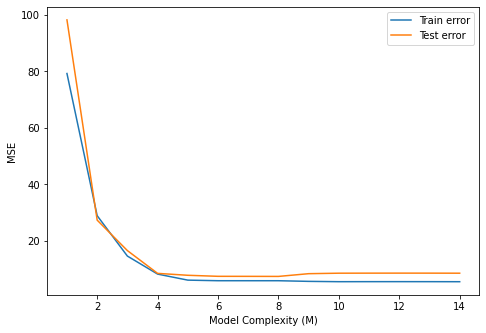

In [22]:
MSE_train = []
MSE_test = []
for d in range(1,15):

    # Creating polynomial data for degree 'd'
    polynomial_converter = PolynomialFeatures(degree=d,interaction_only =False,include_bias=True)
    poly_features = polynomial_converter.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)
    # Training on new polynomial dataset
    model = LinearRegression()
    model.fit(x_train,y_train)
    
    scores = cross_validate(model,x_train,y_train,
                         scoring='neg_mean_squared_error',cv=10)
    
    # Mean squared error for test set
    

    # Prediction on both training and testing set
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    # Mean squared error for test set
    MSE_test.append(mean_squared_error(y_test,test_pred))
    MSE_train.append(mean_squared_error(y_train,train_pred))

fig = plt.figure()
axes1 = fig.add_axes([0,0,1,1])
plt.plot(range(1,15),MSE_train,label='Train error')
plt.plot(range(1,15),MSE_test,label='Test error')
plt.xlabel("Model Complexity (M)")
plt.ylabel("MSE")
# axes1.set_ylim(0,200)
plt.legend()
plt.show()

In [23]:
final_poly_converter = PolynomialFeatures(degree =6,interaction_only =False,include_bias=True)
final_poly_features = final_poly_converter.fit_transform(x)
poly_features_test = final_poly_converter.fit_transform(z)
x_train, x_test, y_train, y_test = train_test_split(final_poly_features, y, test_size=0.3, random_state=101)
    
# Training
final_model = LinearRegression()
final_model.fit(x_train,y_train)

# Prediction on both training and testing set
train_pred_ = final_model.predict(x_train)
test_pred_ = final_model.predict(x_test)

scores = cross_validate(model,x_train,y_train,
                         scoring='neg_mean_squared_error',cv=10)
# Calculation of errors

# Errors on Train Set
train_RMSE_ = np.sqrt(mean_squared_error(y_train,train_pred_))
print(f'Train root mean squared error is {train_RMSE_}')
# Errors on Test Set
test_RMSE_ = np.sqrt(mean_squared_error(y_test,test_pred_))
print(f'Test root mean squared error is {test_RMSE_}')
final_test_result = final_model.predict(poly_features_test)
# df_test['value'] = pd.Series(final_test_result)

Train root mean squared error is 2.4359409390478315
Test root mean squared error is 2.7621613738942554


In [24]:
final_test_result = final_test_result.flatten()

In [25]:
final_test_result
# df_test['value'] = pd.DataFrame(final_test_result)

array([25.74907066, 21.24953843,  5.05103739,  3.492185  ,  6.09050951,
       12.47852838, 25.317204  , 13.53354559,  0.28244443, 20.22758693])

In [26]:

# df_ = pd.DataFrame({'id': np.array(df_test['id']).reshape(10,1), 'value':np.array(final_test_result).reshape(10,1)})
df_ = pd.DataFrame({'id': df_test['id'], 'value':final_test_result})

print('DataFrame:\n', df_)

# default CSV
df_.to_csv('result_final1.csv')
# print('\nCSV String:\n', csv_data)

DataFrame:
         id      value
0   5/1/10  25.749071
1   4/1/09  21.249538
2   9/1/13   5.051037
3   1/1/06   3.492185
4   2/1/07   6.090510
5   8/1/12  12.478528
6   6/1/14  25.317204
7   3/1/08  13.533546
8  12/1/04   0.282444
9   7/1/11  20.227587
